# OOP and Gradient Descent

# Class and Object

A class combines data/attribute and functionality/method together

An object is an instance of a class

In [2]:
from math import sqrt

class Vector():
    # custom type for 2d vectors

    # class attribute shared by all objects of this class
    dim = 2
    
    def __init__(self, input_x, input_y):
        # constructor, called when new object is created, Vector(x,y)
        # self is the object being created
        # .x and .y are object attributes
        self.x = input_x
        self.y = input_y
    
    def length(self):
        # length method, returns length of vector
        l = sqrt(self.x**2+self.y**2)
        return l
    
    def scale(self, c):
        # method that scales the vector by a constant c
        # changes the object itself
        # no return value, so returns None
        self.x = self.x * c
        self.y = self.y * c

    def __repr__(self):
        # string representation of the object
        # without this method, it prints the memory address
        return f'({self.x},{self.y})'
            
    
    def add(self, other_vector):
        # method that adds another vector to this vector, returns new vector
        x_new = self.x + other_vector.x
        y_new = self.y + other_vector.y
        return Vector(x_new, y_new)
        
    def __add__(self, other_vector):
        # special method that overloads the + operator
        # without this method, vector + vector would raise an error
        x_new = self.x + other_vector.x
        y_new = self.y + other_vector.y
        return Vector(x_new, y_new)
    
    def normalize(self):
        # method that scales the vector to unit length
        # can call other methods of the same object
        l = self.length()
        self.scale(1/l)

In [4]:
v = Vector(3,4)
v.x
print(v.x)
v.normalize()
print(v.length())
print(v)

3
1.0
(0.6000000000000001,0.8)


In [3]:
v = Vector(1,1)
w = Vector(2,3)

# custom add method
p = v.add(w)
print(p)

# this is actually calling the __add__ method
q = v + w
print(q)



(3,4)
(3,4)


# Gradient Descent (GD)

Problem: minimize f(x), $x \in \mathbb{R}^d$

Suppose $\nabla f(x) = [f'(x_1), f'(x_2), ... , f'(x_d)]^T$ is the gradient of the function $f(x)$ at point $x$, and we have some initial guess $x_0$.

Our goal is to generate a sequence of numbers $x_0$, $x_1$, $x_2$ ... that iteratively approaches a local minimizer of the function.

Idea: the gradient of a function at a point gives the direction of the steepest ascent of the function at that point. So, if we move in the opposite direction of the gradient, we should be moving towards a local minimum.

$$x_{i+1} = x_i - \alpha \nabla f(x_i)$$

where $\alpha$ is the step size or learning rate. We repeat this process until $|f'(x_i)|$ is close to 0 for some $i$.

Note:

- This algorithm tends to go to the closest local minimum.

- If $\nabla f(x_i)=0$, then we are at stationary point so we won't move.

- In the simplest form $\alpha$ is fixed by the user. For more advanced versions, it will be adaptive or randomized.





## Interactive Visualization

[1D visualization](https://uclaacm.github.io/gradient-descent-visualiser/)

[2D visualization](https://blog.skz.dev/gradient-descent)



## Implementing GD using the Vector class

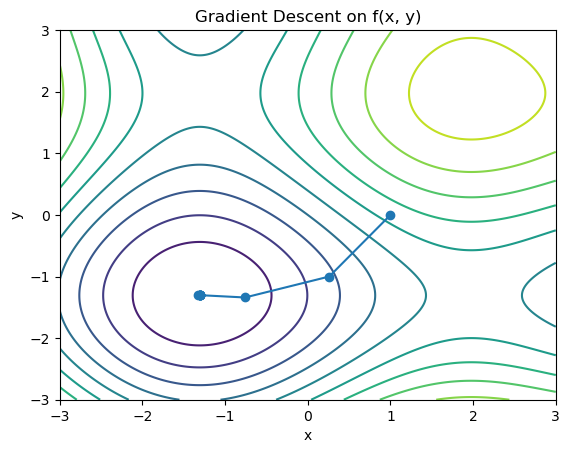

Final objective value: -15.891646751230518 at point (-1.306439918487552,-1.3064400276166004)


In [7]:
import numpy as np
import matplotlib.pyplot as plt


# test function 1, simple quadratic
# f = lambda x, y: x**2 + y**2 
# grad_f = lambda x, y: Vector(2 * x , 2 * y)

# test function 2, more complex landscape
f = lambda x, y: x**2 + y**2 + 10 * np.sin(x) + 10 * np.sin(y)
grad_f = lambda x, y: Vector(2 * x + 10 * np.cos(x), 2 * y + 10 * np.cos(y))

# initial guess and learning rate, this is x0
xi = Vector(1,0) 
learning_rate = 0.1
trajectory = [xi]
n_steps = 10

# Gradient descent algorithm
for _ in range(n_steps):  # Fewer iterations for clarity

    # compute gradient vector
    grad = grad_f(xi.x, xi.y)

    # this is -learning_rate * grad
    grad.scale(-learning_rate)

    # this is x_{i+1} = x_i  - learning_rate * grad
    xi = xi + grad

    # append new point to trajectory
    trajectory.append(xi)

# why not write "xi - learning_rate * grad" ?
# because our custom class does not define subtraction and multiplication
# we only defined addition and scaling


### the following code is for visualizing the contour of the objective function f(x,y)
# see the documentation and example for contour plot
# https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py
# Create a grid of x, y trajectory for the contour plot
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
# Contour plot
plt.contour(X, Y, Z, levels=10)  # Adjust the number of levels for more detail
### end of plotting contour

# plot trajectory
x_coords = [p.x for p in trajectory]
y_coords = [p.y for p in trajectory]
plt.plot(x_coords, y_coords, '-o')

plt.title('Gradient Descent on f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# print final objective value and final point
print(f'Final objective value: {f(xi.x, xi.y)} at point {xi}')

